In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('..')

In [3]:
version = 300

In [9]:
order_list = ['harm pos', 'harm neg', 'fairness pos', 'fairness neg','authority pos', 'authority neg', 
              'loyalty pos', 'loyalty neg', 'purity pos', 'purity neg',]



## Central peripheral

In [12]:
frequency_df = pd.read_csv(f'../../data/Survey Data/N300/freqs/v2_new_frequency_ses_count_weighted_full_CHILDES_version_N{version}_certain_fvote_True.csv')
frequency_df['sentiment'] = ['Positive' if s == 'pos' else 'Negative' for s in frequency_df['sentiment']]

In [13]:
frequency_df.loc[frequency_df.age == 4].head(3)

,Unnamed: 0,category,sentiment,moral foundation,age,identity,count,non mfd,non-moral,sum,freq,moral frequency,race,social class
60,60,harm,Positive,harm pos,4,child,127,21001,888,22016,0.005769,0.466683,Black,UC
61,61,harm,Negative,harm neg,4,child,100,21001,9,21110,0.004737,0.383238,Black,UC
62,62,authority,Positive,authority pos,4,child,0,21001,8,21009,0.000000,0.000000,Black,UC


In [14]:
frequency_df['frequency of moral language'] = frequency_df['count'] / frequency_df['sum']

In [15]:
child_df = frequency_df.loc[frequency_df.identity == 'child']
parent_df = frequency_df.loc[frequency_df.identity == 'parent']


order_list = ['harm pos', 'harm neg', 'fairness pos', 'fairness neg','authority pos', 'authority neg', 
              'loyalty pos', 'loyalty neg', 'purity pos', 'purity neg',]



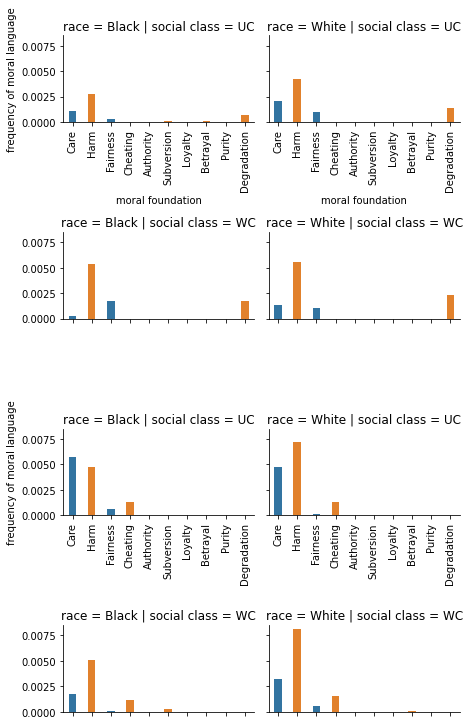

In [44]:
fig ,axes = plt.subplots(4, 2,figsize = (6.5, 10), sharex = False, sharey = True)
ids = ['CDS', 'CS']
dfs = [parent_df, child_df]
for i , df in enumerate(dfs):
    
    black_uc = df.loc[(df.race == 'Black') & (df['social class'] == 'UC' )]
    white_uc = df.loc[(df.race == 'White') & (df['social class'] == 'UC' )]
    black_wc = df.loc[(df.race == 'Black') & (df['social class'] == 'WC' )]
    white_wc = df.loc[(df.race == 'White') & (df['social class'] == 'WC' )]
    df_list = [black_uc,black_wc, white_uc , white_wc]
    for j, ses_df in enumerate(df_list):
        
#         ax = axes[j // 2, 2 * i  + j % 2]
        ax =  axes[2 * i  + j % 2,j // 2]
    
        g = sns.barplot(data = ses_df,  x = 'moral foundation' , y = 'frequency of moral language',
                     ax = ax, hue = 'sentiment',dodge=False,order = order_list)

       

        
        
        sns.despine(left = False,top = True)
        if  2 * i  + j % 2 != 0:
            ax.set_xlabel('')
        if (2 * i  + j % 2 ) % 2 != 0:
            ax.set_ylabel('')
        
        
            

        if j // 2 != 0:
#             ax.set_xlabel('')
            ax.set_ylabel('')
        ax.set_xticklabels(['Care' ,'Harm','Fairness', 'Cheating','Authority', 'Subversion','Loyalty' ,'Betrayal',
                            'Purity', 'Degradation'], rotation = 90)
        if (2 * i  + j % 2 ) % 2 != 0:
            ax.set_xticklabels([''] * 10, rotation = 90)
            
            
        race= list(ses_df['race'])[0]
        social_class= list(ses_df['social class'])[0]
        ax.set_title(f'race = {race} | social class = {social_class}')
        ax.legend_ = None
        locs = ax.get_xticks()
       
        for k,patch in enumerate(ax.patches):
            current_width = patch.get_width()
            
            new_value = 0.4
            diff = current_width - new_value

            # we change the bar width
            patch.set_width(new_value)

            # we recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

fig.tight_layout()



plt.savefig(f'../../moral_sentence_weighted_vote_ses_frequency_full_version_N{version}_vertical.png', dpi = 200, bbox_inches = 'tight')
plt.show()